<a href="https://colab.research.google.com/github/NishmithaJR/Data-Analytics-Project/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Analytics/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
495,496,Male,20,79,48
496,497,Male,60,91,17
497,498,Male,33,122,7
498,499,Male,38,73,91


**How many customers entered the mall?**

In [ ]:
# Calculate the number of customers who entered the mall
num_customers = df['CustomerID'].nunique()

# Print the number of customers
print(f"The number of customers who entered the mall is: {num_customers}")

The number of customers who entered the mall is: 500


**How many customers are aged 21 and above?**

/tmp/ipython-input-4-1291821649.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Age Group', y='Count', data=age_counts, palette='viridis')


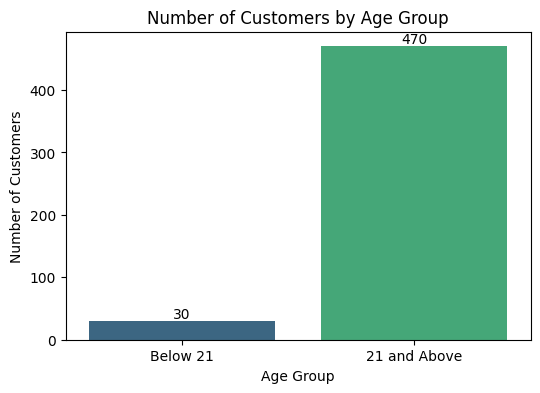

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 20, np.inf], labels=['Below 21', '21 and Above'])

# Count customers in each age group
age_counts = df['age_group'].value_counts().reset_index()
age_counts.columns = ['Age Group', 'Count']

# Plot the counts
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Age Group', y='Count', data=age_counts, palette='viridis')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

**How many customers are male and how many are female?**

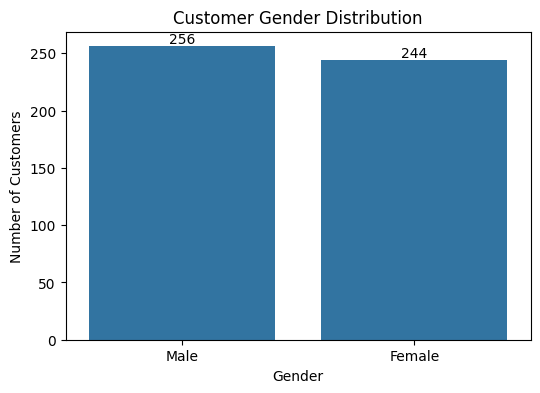

In [ ]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Gender', y='Count', data=gender_counts)

# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

**Who spent more on purchase, male or female?**

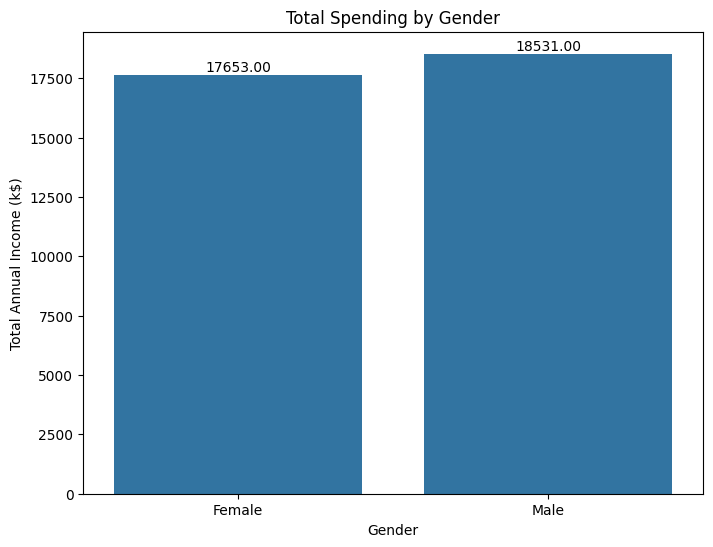

In [ ]:
gender_spending = df.groupby('Gender')['Annual Income (k$)'].sum().reset_index()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Gender', y='Annual Income (k$)', data=gender_spending)

# Add the spending amount on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Annual Income (k$)')
plt.show()

**How many customers have annual income 50k$ and above?**

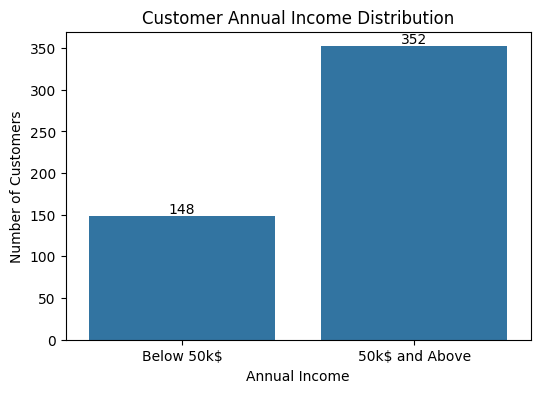

Number of customers with annual income 50k$ and above: 352


In [ ]:
customers_50k_and_above = df[df['Annual Income (k$)'] >= 50]['CustomerID'].count()
customers_below_50k = df[df['Annual Income (k$)'] < 50]['CustomerID'].count()

income_counts = pd.DataFrame({'Income Group': ['Below 50k$', '50k$ and Above'], 'Count': [customers_below_50k, customers_50k_and_above]})

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Income Group', y='Count', data=income_counts)

# Add count labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Customer Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.show()

print(f"Number of customers with annual income 50k$ and above: {customers_50k_and_above}")